perceptron vector base method and ANN method dealing with AND OR XOR problems

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# perceptron vector base
def perceptron_method(X,Tag,lr=1e-1,W=None):
    #X=np.concatenate((x,np.ones((len(x),1))),axis=1)
    X=np.hstack((X,np.ones((len(X),1))))
    if W is None:
        W = X[np.random.randint(len(X))]
    done = False
    while not done:
        done = True
        for i,x in enumerate(X):
            if Tag[i]*np.dot(x,W) <= 0 :
                W = W+x*lr*Tag[i]
                done = False    
    return W

In [207]:
def plot_hyperplane2D(X, Tag, W):
    X = np.array(X)
    Tag = np.array(Tag)
    plt.plot(X[Tag==1, 0], X[Tag==1, 1], 'go')
    plt.plot(X[Tag==-1, 0], X[Tag==-1, 1], 'ro')
    xlim = plt.gca().get_xlim()
    slope = -W[0] / W[1]
    bias = -W[-1]/ W[1]
    plt.plot(xlim, [xlim[0] * slope + bias, xlim[1]*slope +bias], '--')
    

In [330]:
def plot_hyperplane2D_noline(X, Tag):
    X = np.array(X)
    Tag = np.array(Tag)
    plt.plot(X[Tag==1, 0], X[Tag==1, 1], 'go')
    plt.plot(X[Tag==-1, 0], X[Tag==-1, 1], 'ro')
    

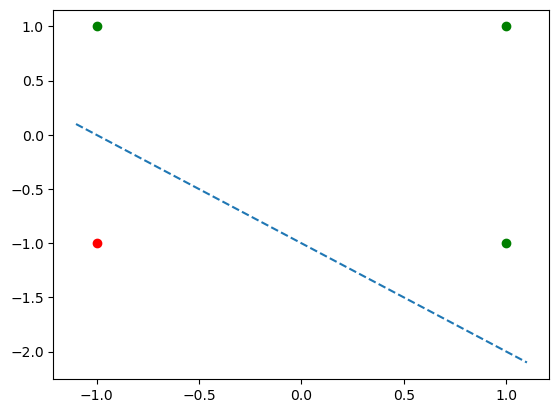

In [5]:
# OR 
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,1,1,-1]

w=perceptron_method(X,T,lr=1e-1,W=None)
plot_hyperplane2D(X,T,w)

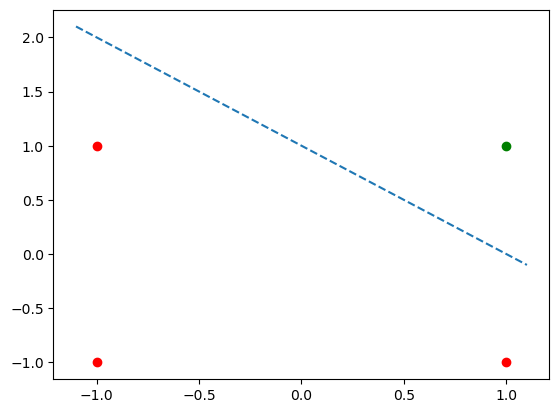

In [6]:
# AND
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,-1,-1,-1]

w=perceptron_method(X,T,lr=1e-1,W=None)
plot_hyperplane2D(X,T,w)

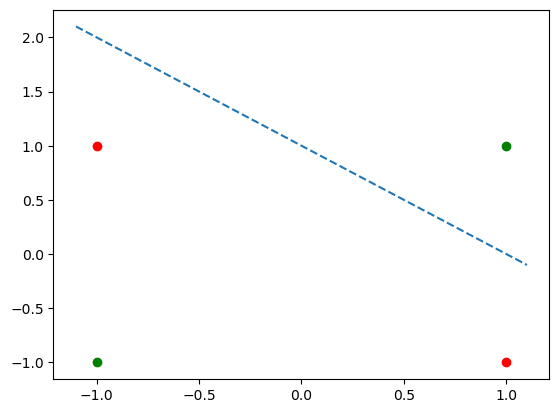

In [7]:
# XOR  (infinite loop)
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,-1,-1,1]

#w=perceptron_method(X,T,lr=1e-1,W=None)
plot_hyperplane2D(X,T,w)

In [111]:
# Perceptron with TF
import tensorflow as tf 

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1, input_shape=(2,)))
model.add(tf.keras.layers.Activation(tf.keras.activations.tanh))

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
 activation_16 (Activation)  (None, 1)                 0         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


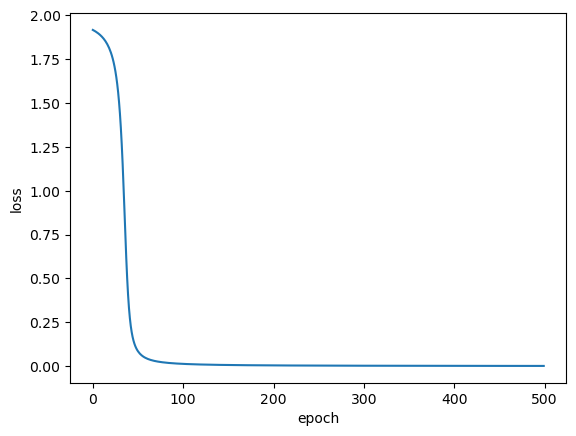

0 dense_22 True
1 activation_16 True
1/1 [==============================] - 0s 56ms/step
[[ 0.99997634]
 [ 0.94383293]
 [ 0.94383293]
 [-0.9721008 ]]
[1, 1, 1, -1]


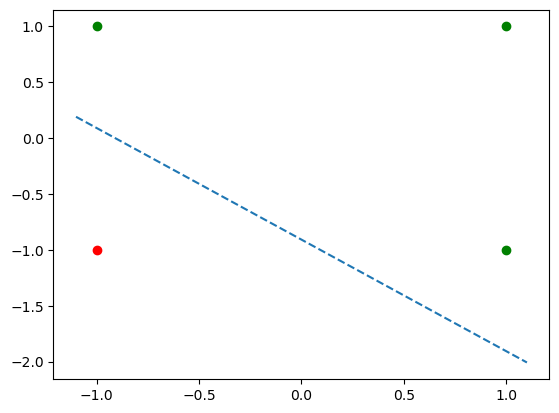

In [129]:
# OR
# note this method use tanh activation  
# the intersection line imply to the layer before going to tanh activation function
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,1,1,-1]


model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

History = model.fit(X,T, epochs=500, verbose=0)

plt.plot(History.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# list model layer
for i,l in enumerate(model.layers):
    print(i,l.name, l.trainable) 

#get weigth and plot

#W=model.layers[numlayer['dense_3']].get_weights()
W=model.layers[0].get_weights()
w=np.concatenate([W[0][0],W[0][1],W[1]])
plot_hyperplane2D(X,T,w)

Y=model.predict(X)
print(Y)
print(T)


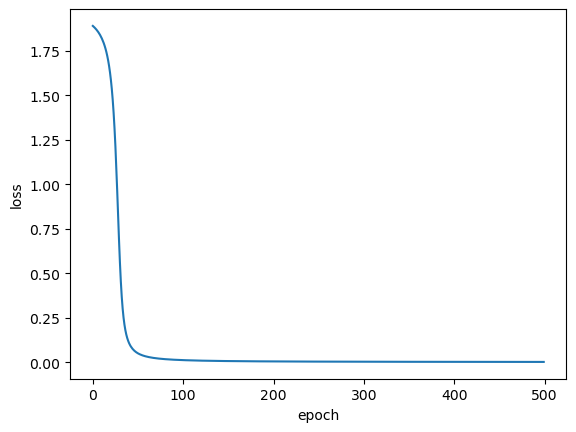

1/1 [==============================] - 0s 57ms/step
[[ 0.9736654]
 [-0.9444376]
 [-0.9444376]
 [-0.9999783]]
[1, -1, -1, -1]


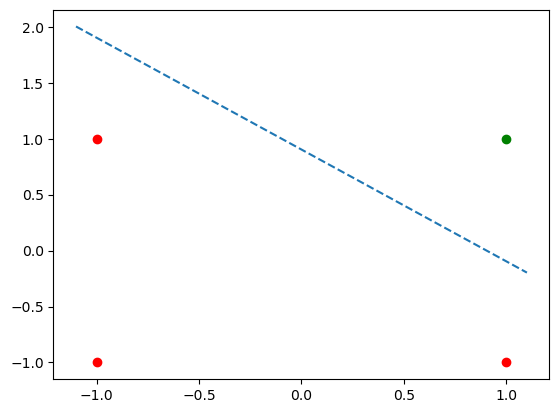

In [130]:
# AND 

X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,-1,-1,-1]

model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

History = model.fit(X,T, epochs=500, verbose=0)

plt.plot(History.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

W=model.layers[0].get_weights()
w=np.concatenate([W[0][0],W[0][1],W[1]])
plot_hyperplane2D(X,T,w)

Y=model.predict(X)
print(Y)
print(T)

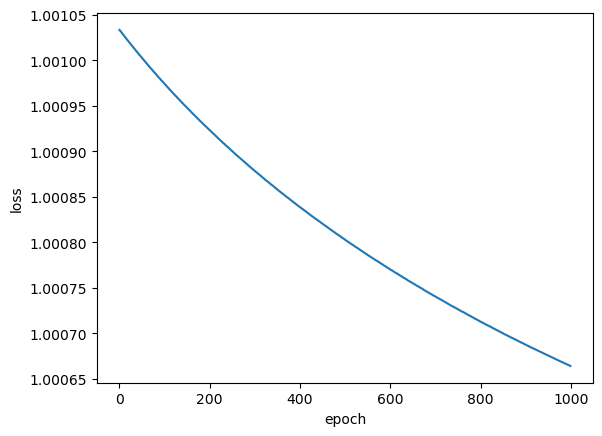

1/1 [==============================] - 0s 56ms/step
[[ 0.97110164]
 [-0.96959716]
 [-0.96959716]
 [-0.9999931 ]]
[1, -1, -1, 1]


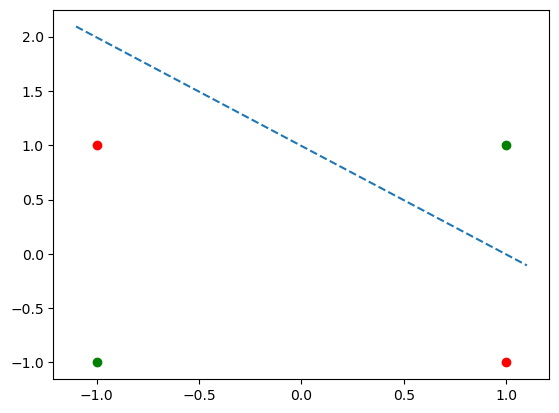

In [138]:
# XOR  (infinite loop)
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,-1,-1,1]


model.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

History = model.fit(X,T, epochs=1000, verbose=0)

plt.plot(History.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

W=model.layers[0].get_weights()
w=np.concatenate([W[0][0],W[0][1],W[1]])
plot_hyperplane2D(X,T,w)

Y=model.predict(X)
print(Y)
print(T)

In [148]:
# model more complex with 5 perceptrons Fully connected layer
input_1 = tf.keras.layers.Input(shape=(2,)) 
x= tf.keras.layers.Dense(5, activation=tf.keras.activations.tanh)(input_1)
x= tf.keras.layers.Dense(1, activation=tf.keras.activations.tanh)(x) 

model2 = tf.keras.Model([input_1], x)

model2.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_29 (Dense)            (None, 5)                 15        
                                                                 
 dense_30 (Dense)            (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


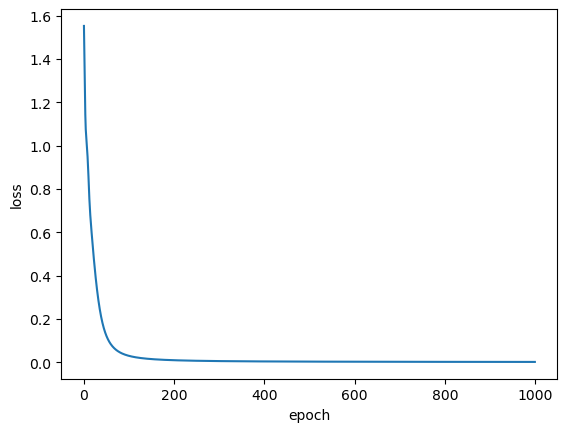

1/1 [==============================] - 0s 64ms/step
[[ 0.96659964]
 [-0.9641768 ]
 [-0.9717895 ]
 [ 0.9695468 ]]
[1, -1, -1, 1]


In [149]:
# XOR  (infinite loop)
X = [[1,1], [1,-1], [-1,1],[-1, -1]]
T = [1,-1,-1,1]


model2.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.SGD(learning_rate=0.1))

History = model2.fit(X,T, epochs=1000, verbose=0)

plt.plot(History.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#W=model2.layers[0].get_weights()
#w=np.concatenate([W[0][0],W[0][1],W[1]])
#plot_hyperplane2D(X,T,w)

Y=model2.predict(X)
print(Y)
print(T)

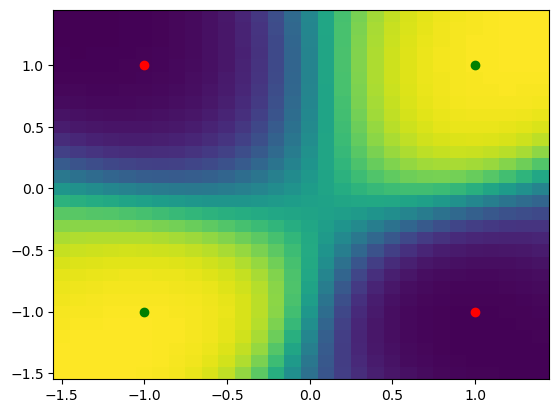

In [339]:
XYgrid=np.arange(-1.5,1.5,0.1)
size=XYgrid.shape[0]
ColorMap=np.zeros((size,size))

for i,iv in enumerate(XYgrid):
    minV=1
    for j,jv in enumerate(XYgrid):
        V=model2.predict([[iv,jv]],verbose=0)[0][0]
        ColorMap[i][j]=V
""" 
#find the line 
LineMapX=[]
LineMapY=[]
x=[]
C=np.abs(ColorMap)

for i in range(size) :
    y=np.where(C[i,:]==C[i,:].min())[0][0]
    x+=[y]    

x= np.array(x)/ColorMap.shape[1]*2-1 
"""

plt.pcolor(XYgrid,XYgrid,ColorMap)
plot_hyperplane2D_noline(X,T)
plt.show()